In [198]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from pandas_ml import ConfusionMatrix
from sklearn.metrics import roc_curve, auc


%matplotlib inline

In [152]:
train_cleaned = pd.read_csv("C:\\users\\jason\\projects\\titantic\\data\\train-cleaned.csv")
train_cleaned

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
5,0,29.699118,0,0,8.4583,0,1,0,1,0,0,0,1
6,0,54.000000,0,0,51.8625,0,1,0,0,1,1,0,0
7,0,2.000000,3,1,21.0750,0,1,0,0,1,0,0,1
8,1,27.000000,0,2,11.1333,1,0,0,0,1,0,0,1
9,1,14.000000,1,0,30.0708,1,0,1,0,0,0,1,0


In [153]:
y = train_cleaned.pop('Survived')
x = train_cleaned

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10, random_state = 42)
y_train

76     0
743    1
473    0
211    0
718    0
825    0
110    0
334    0
811    0
867    1
559    0
783    0
688    1
633    0
768    0
569    1
667    0
215    1
851    1
552    1
651    0
874    0
96     1
265    0
382    1
213    0
174    0
316    0
465    0
78     1
      ..
276    0
191    1
385    0
805    0
413    1
491    0
343    0
769    0
308    1
661    0
130    0
663    1
871    0
99     0
372    0
87     1
458    0
330    0
214    1
466    0
121    0
614    1
20     0
700    1
71     0
106    1
270    1
860    1
435    0
102    0
Name: Survived, Length: 800, dtype: int64

In [156]:
x_train

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
76,29.699118,0,0,8.0500,0,1,0,0,1,0,0,1
743,31.000000,0,0,7.9250,0,1,0,0,1,0,0,1
473,22.000000,0,0,9.8375,1,0,0,0,1,0,0,1
211,22.000000,0,0,7.2500,0,1,0,0,1,0,0,1
718,33.000000,0,0,7.7750,0,1,0,0,1,0,0,1
825,29.699118,0,0,56.4958,0,1,0,0,1,0,0,1
110,14.500000,1,0,14.4542,1,0,1,0,0,0,0,1
334,29.699118,0,0,7.8958,0,1,0,0,1,0,0,1
811,35.000000,0,0,10.5000,0,1,0,0,1,0,1,0
867,4.000000,1,1,11.1333,0,1,0,0,1,0,0,1


In [157]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, x_train, y_train, cv=3)

In [158]:
scores

array([ 0.80149813,  0.83146067,  0.79699248])

In [159]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
print(random_search.best_estimator_)
print(random_search.best_score_)
print("")

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(x_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 1.31 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.830 (std: 0.020)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.824 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.823 (std: 0.007)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 7}

Model with rank: 3
Mean validation score: 0.823 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 6, 'min_samples_split': 4}

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_feat

In [160]:
best_fit = grid_search.best_estimator_

In [161]:
predictions = best_fit.predict(x_test)
accuracy_score(y_test, predictions)

0.797752808988764

In [191]:
predicted_probas = best_fit.predict_proba(x_test)

In [163]:
confusion_matrix(y_test, predictions)

array([[49,  9],
       [ 9, 22]], dtype=int64)

In [166]:
pd.crosstab(y_test, predictions, rownames=['Actual Survived'], colnames=['Predicted Survived'])

Predicted Survived,0,1
Actual Survived,,
0,49,9
1,9,22


In [180]:
cm = ConfusionMatrix(y_test.values, predictions)
cm.print_stats()

population: 89
P: 31
N: 58
PositiveTest: 31
NegativeTest: 58
TP: 22
TN: 49
FP: 9
FN: 9
TPR: 0.709677419355
TNR: 0.844827586207
PPV: 0.709677419355
NPV: 0.844827586207
FPR: 0.155172413793
FDR: 0.290322580645
FNR: 0.290322580645
ACC: 0.797752808989
F1_score: 0.709677419355
MCC: 0.554505005562
informedness: 0.554505005562
markedness: 0.554505005562
prevalence: 0.348314606742
LRP: 4.57347670251
LRN: 0.343647136274
DOR: 13.3086419753
FOR: 0.155172413793


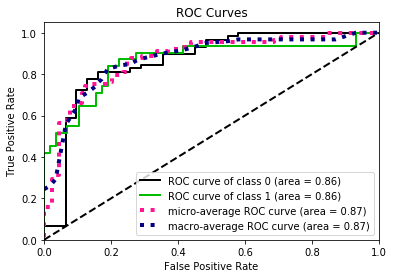

In [192]:
skplt.metrics.plot_roc_curve(y_test, predicted_probas)

In [208]:
n_classes = 0

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

roc_auc

{'micro': 0.77725250278086766}

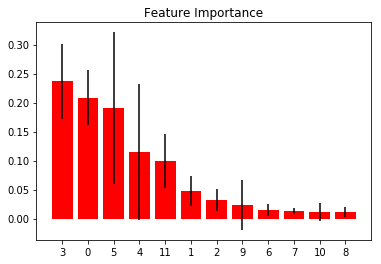

In [204]:
skplt.estimators.plot_feature_importances(best_fit)

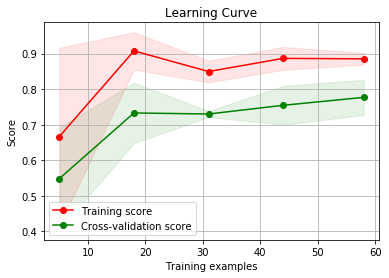

In [209]:
skplt.estimators.plot_learning_curve(best_fit, x_test, y_test)